# Water System Simulation
Tobias Siegfried, 08.10.2024

This project implements an object-oriented water system simulation and optimization tool using Python. It models water systems as networks of nodes and edges in a directed acyclic graph, allowing for the simulation and optimization of water flow over multiple time steps.

More information is available in the README.md file.

## Create Sample Water System

In [9]:
# Import necessary classes from the water_system package
from water_system import WaterSystem, SupplyNode, StorageNode, DemandNode, Edge, SinkNode

# Create instances of nodes
supply_node = SupplyNode("Supply1", default_supply_rate=10)
#supply_node = SupplyNode("Supply1", supply_rates=[10, 12, 8, 15], default_supply_rate=10)
reservoir = StorageNode(id="Reservoir", capacity=12)  # 1000 m³ capacity
agriculture_demand = DemandNode(id="Agriculture", demand_rate=6)  # 6 m³/s
domestic_demand = DemandNode(id="Domestic", demand_rate=3)  # 3 m³/s
sink_node = SinkNode("Sink")

# Create edges to connect the nodes
edge1 = Edge(source=supply_node, target=reservoir, capacity=15)
edge2 = Edge(source=reservoir, target=agriculture_demand, capacity=6)
edge3 = Edge(source=reservoir, target=domestic_demand, capacity=1)
edge4 = Edge(source=agriculture_demand, target=sink_node, capacity=10)
edge5 = Edge(source=domestic_demand, target=sink_node, capacity=10)

# Create a WaterSystem instance and add the nodes and edges
water_system = WaterSystem()

# Add nodes
for node in [supply_node, reservoir, agriculture_demand, domestic_demand, sink_node]:
    water_system.add_node(node)

# Add edges
for edge in [edge1, edge2, edge3, edge4, edge5]:
    water_system.add_edge(edge)

## Run Simulation and Plot Results

### Run Simulation

In [10]:
# Run the simulation for a specified number of time steps (e.g., 12 months)
num_time_steps = 12
water_system.simulate(num_time_steps)

### Visualize Results

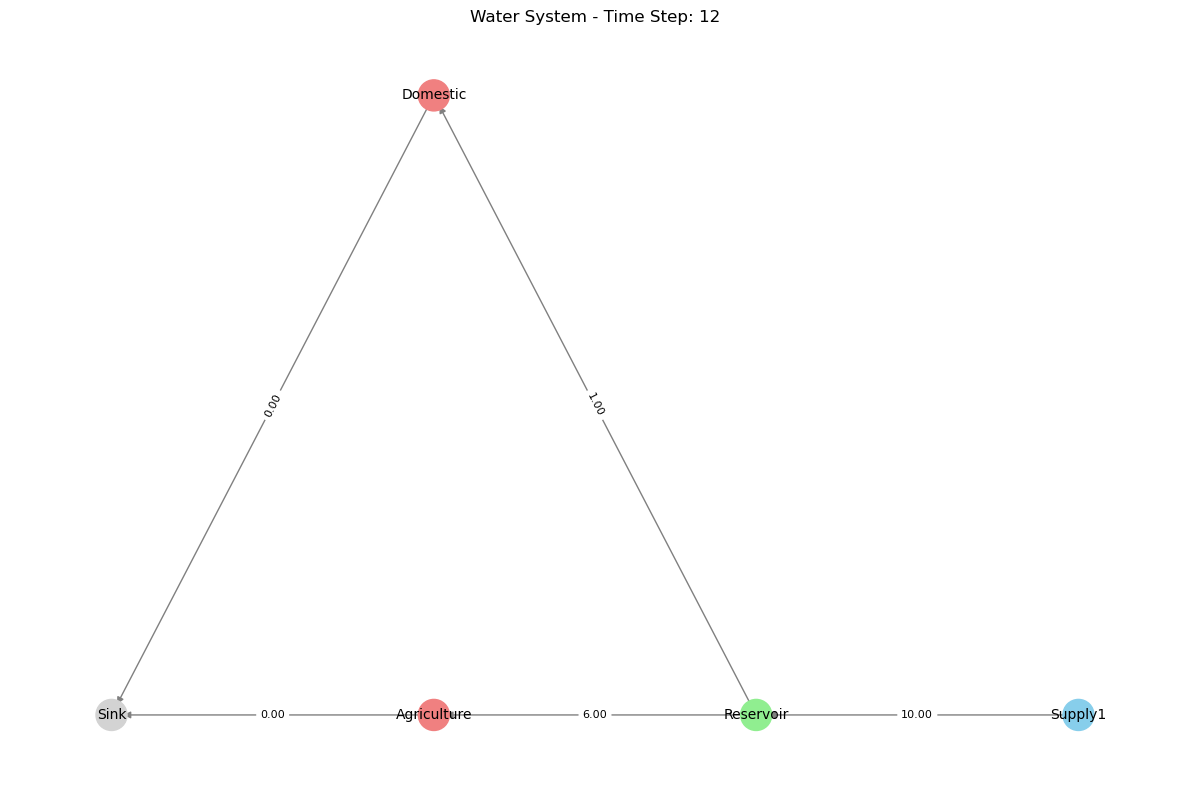

In [11]:
# Visualize the results
water_system.visualize()

### Print Water Balances at Nodes

#### Water Balance per Time Step and Node

In [12]:
water_system.print_water_balances()


Time Step 0:
  Supply1: Inflow = 0.00, Outflow = 10.00, Balance = -10.00
  Reservoir: Inflow = 10.00, Outflow = 7.00, Storage Change = 3.00, Balance = 0.00
  Agriculture: Inflow = 6.00, Outflow = 0.00, Satisfied Demand = 6.00, Balance = 0.00
  Domestic: Inflow = 1.00, Outflow = 0.00, Satisfied Demand = 1.00, Balance = 0.00
  Sink: Inflow = 0.00, Outflow = 0.00, Balance = 0.00

Time Step 1:
  Supply1: Inflow = 0.00, Outflow = 10.00, Balance = -10.00
  Reservoir: Inflow = 10.00, Outflow = 7.00, Storage Change = 3.00, Balance = 0.00
  Agriculture: Inflow = 6.00, Outflow = 0.00, Satisfied Demand = 6.00, Balance = 0.00
  Domestic: Inflow = 1.00, Outflow = 0.00, Satisfied Demand = 1.00, Balance = 0.00
  Sink: Inflow = 0.00, Outflow = 0.00, Balance = 0.00

Time Step 2:
  Supply1: Inflow = 0.00, Outflow = 10.00, Balance = -10.00
  Reservoir: Inflow = 10.00, Outflow = 7.00, Storage Change = 3.00, Balance = 0.00
  Agriculture: Inflow = 6.00, Outflow = 0.00, Satisfied Demand = 6.00, Balance = 0.

#### Water Balance Table

In [14]:
# Get the water balance table
balance_table = water_system.get_water_balance_table()

# Display the table
print(balance_table)

# Optionally, save the table to a CSV file
balance_table.to_csv("water_balance_table.csv", index=False)

    TimeStep  Supply1_Inflow  Supply1_Outflow  Supply1_SupplyRate  \
0          0               0             10.0                  10   
1          1               0             10.0                  10   
2          2               0             10.0                  10   
3          3               0             10.0                  10   
4          4               0             10.0                  10   
5          5               0             10.0                  10   
6          6               0             10.0                  10   
7          7               0             10.0                  10   
8          8               0             10.0                  10   
9          9               0             10.0                  10   
10        10               0             10.0                  10   
11        11               0             10.0                  10   

    Reservoir_Inflow  Reservoir_Outflow  Reservoir_Storage  \
0               10.0                7.0 

### Visualize Water Flow Time Series

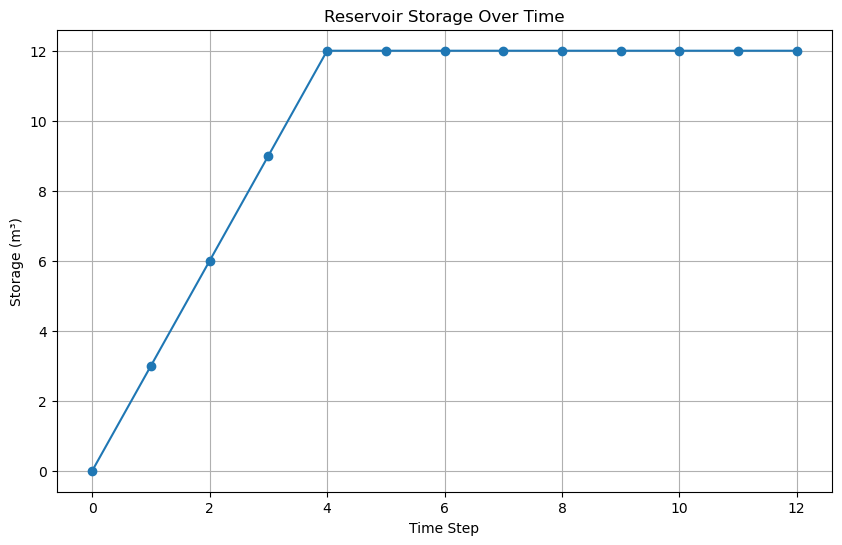

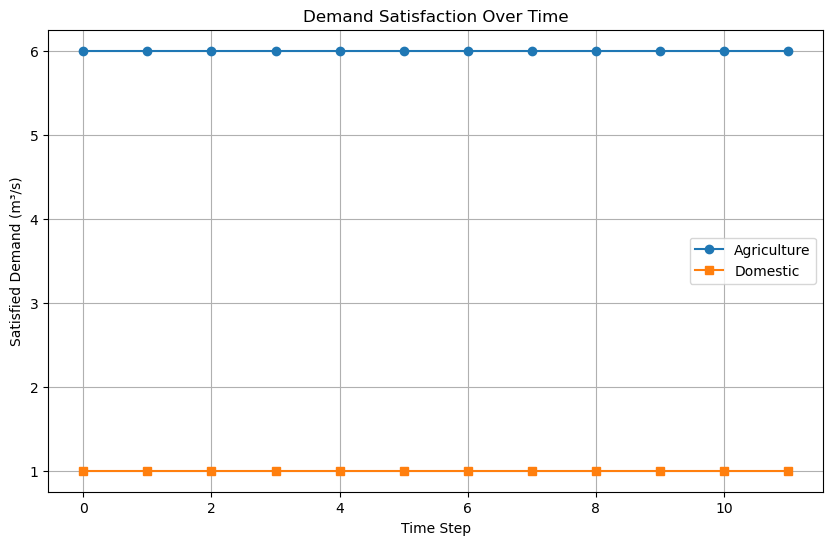

In [15]:
# Plot time series for reservoir storage
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(range(num_time_steps + 1), reservoir.storage, marker='o')
plt.title("Reservoir Storage Over Time")
plt.xlabel("Time Step")
plt.ylabel("Storage (m³)")
plt.grid(True)
plt.show()

# Plot time series for demand satisfaction
plt.figure(figsize=(10, 6))
plt.plot(range(num_time_steps), [min(edge2.flow[t], agriculture_demand.demand_rate) for t in range(num_time_steps)], marker='o', label='Agriculture')
plt.plot(range(num_time_steps), [min(edge3.flow[t], domestic_demand.demand_rate) for t in range(num_time_steps)], marker='s', label='Domestic')
plt.title("Demand Satisfaction Over Time")
plt.xlabel("Time Step")
plt.ylabel("Satisfied Demand (m³/s)")
plt.legend()
plt.grid(True)
plt.show()